In [1]:
%matplotlib notebook

import numpy as np
from scipy.linalg import solve_banded

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()

# Time-Marching Methods

Numerical solutions to any partial differential equation (PDE) can be written in the following semi-discrete form

$$
\frac{\textrm{d} \mathbf{u}}{\textrm{d} t} = \mathbf{A} \mathbf{u}
$$

where for the linear advection PDE, the matrix $\mathbf{A}$ is  equal to $-a \mathcal{D}$, where $a$ is constant and greater than zero and $\mathcal{D}$ is the matrix difference operator of the finite-difference formula. We would like to integrate this system in time to find solutions to $u(x,t)$. How we do this is defined by the time-marching method. Just as we have discretized the spatial dimension, we also discretize the temporal dimension, e.g., $\Delta t = t_{n+1} - t_n$. When discussing different time-marching or time integration methods it is useful to define what is referred to as the *residual* function, $R$.

$$
\frac{\textrm{d} \mathbf{u}}{\textrm{d} t} = \mathbf{u}^{\prime}_n = R(\mathbf{u}_n,t_n)
$$

where we $\mathbf{u}^{\prime}_n$ is just shorthand for the function $R$. Note that $\mathbf{u}_n$ is a vector quantity representing the values of all $u_i^n$ at each mesh point at time, $t_n$. In our example of the linear advection equation, the *residual* function, $R$ at time $t_n$ may equal

$$
R(\mathbf{u}_n,t_n) = \mathbf{u}^{\prime}_n = \mathbf{A} \mathbf{u}_n
$$

Note that the matrix $\mathbf{A}$ is not a function of time, the value of $a$ is constant and the finite-difference matrix operator is not changing. Why is it useful to introduce this notation? Think about what the value of $R$ would be at the next time step, or perhaps at some intermediate time step? For instance, how would we compute

$$
R(\mathbf{u}_{n+\alpha},t_n + \alpha \Delta t)
$$

We could probably define an explicit expression for the above function for the linear advection equation, but it gets more complicated when the matrix $\mathbf{A}$ is not constant, so defining the residual function gives us an opprotunity for some generality.  We can always think of $R$ as the evaluation of the spatial matrix operators at some arbitrary time step $t_n + \alpha \Delta t$, where $\alpha$ is a constant and is defined by the time-marching method.

Euler integration is a simple, first-order *time-marching* method. Two variants of Euler's method are explicit (or forward) time integration, 

$$
\mathbf{u}_{n+1} = \mathbf{u}_n + \left( \Delta t \right) \mathbf{u}^{\prime}_n
$$

and implicit (or backward) time integration.

$$
\mathbf{u}_{n+1} = \mathbf{u}_n + \left( \Delta t \right) \mathbf{u}^{\prime}_{n+1}
$$

# Explicit Time Integration of the Linear Advection Equation

## Point operator form

When we first started deriving difference equations for the linear convection PDE, we started with the first-order, forward-time, backward-space method, which was given as

$$
\left( \delta_t^+ u \right)^n_i  + a \left(\delta^{-}_x u\right)^n_i  = 0,
$$

$$
\frac{u_i^{n+1}-u_i^n}{\Delta t} + a \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0
$$

With some rearranging of the difference equation, we were able to directly solve for the value of $u$ at the next time step, $t_{n+1}$, as follows:

$$
u_i^{n+1} = u_i^n - a \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)
$$

We defined the parameter $\beta$, as the CFL parameter and showed that it was related to the *stability* of the numerical method.

$$
\textrm{CFL} = \beta = a \frac{\Delta t}{\Delta x} \leq 1
$$

we get

$$
u_i^{n+1} = u_i^n - \beta \, \Big( u_i^n - u_{i-1}^n \Big)
$$

As a result of this stability constraint, we loose our ability to freely choose our time step. This is true for all *explicit* time integration schemes. For flows with high-gradients, e.g., viscous flows, our time step can be severely constrained by the necessity to use very small mesh sizes, i.e., as $\Delta x$ decreases, so does $\Delta t$. 

## Matrix operator form

More generally, we can write the same forward-time, backward-space method using the matrix operator form

$$
\mathbf{u}_{n+1} = \mathbf{u}_n + \left( \Delta t \right) \mathbf{u}^{\prime}_n
$$

For the linear advection equation, $\mathbf{u}^{\prime}_n$ is $\mathbf{A} \mathbf{u}_n$, where $\mathbf{A} = -a \mathcal{D}_x$. Furthermore, if we use the backward, first-order matrix operator, we get

$$
\mathbf{u}_{n+1} = \mathbf{u}_n - \left( \Delta t \, a \right) \mathcal{D}_x^{-} \mathbf{u}_n
$$

Note that the matrix difference operator $\mathcal{D}_x$ includes the $\frac{1 }{ \Delta x }$ term and is equivalent to the point-operator form derived above.

# Implicit Time Integration of the Linear Advection Equation

## Point operator form

The Backward Euler or Implicit Euler method for the linear advection equation is given as

$$
\left( \delta_t^+ u \right)^n_i  + a \left(\delta^{-}_x u\right)^{n+1}_i  = 0,
$$

where the point difference operator for the spatial derivative is now applied at the $t_{n+1}$ time step. Applying the operators results in

$$
\frac{u_i^{n+1}-u_i^n}{\Delta t} + a \frac{u_i^{n+1} - u_{i-1}^{n+1}}{\Delta x} = 0
$$

With some rearranging of the difference equation

$$
\left(1 + \frac{ a \Delta t}{\Delta x} \right) u^{n+1}_i - \left( \frac{ a \Delta t}{\Delta x} \right) u^{n+1}_{i-1} =  u^n_i.
$$

and using the definition of $\beta$, we can simplify the implicit difference equation to 

$$
\left(1 + \beta \right) u^{n+1}_i - \beta \, u^{n+1}_{i-1} =  u^n_i 
$$

In contrast to the explicit, forward-time, backward-space method, we should notice that the we can not directly solve for $u^{n+1}_i$. Instead, we see that the solution for $u^{n+1}_i$ depends on not just the value of $u$ at the i-th index, but also at the $i+1$ index. As a result, we need to solve a system of difference equations, one for each of the mesh points in our domain. If we have $N_x$ mesh points, we now need to solve a linear system of $N_x$ difference equations. 

<img src="FTBS_Implicit.png" alt="FTBS_Implicit.png" width="300" height="400">

The *stencil* diagram visually shows the mesh points and time points that are used in the difference equation. Rearranging the difference equation, we can directly solve for the value of $u$ at the next time step, $t_{n+1}$, as follows:

## Matrix operator form

More generally, we can write the same forward-time, backward-space method using the matrix operator form

$$
\mathbf{u}_{n+1} = \mathbf{u}_n + \left( \Delta t \right) \mathbf{u}^{\prime}_{n+1}
$$

For the linear advection equation, $\mathbf{u}^{\prime}_{n+1}$ is $\mathbf{A} \mathbf{u}_{n+1}$, where $\mathbf{A} = -a \mathcal{D}_x$. Furthermore, if we use the backward, first-order matrix operator, we get

$$
\mathbf{u}_{n+1} = \mathbf{u}_n - \left( \Delta t \, a \right) \mathcal{D}_x^{-} \mathbf{u}_{n+1}
$$

Note that the matrix difference operator $\mathcal{D}_x$ includes the $\frac{1 }{ \Delta x }$ term and is equivalent to the point-operator form derived above. With some rearrangment, 

$$
\Big[ \mathbf{I} + \left( \Delta t \, a \right) \mathcal{D}_x^{-} \Big] \mathbf{u}_{n+1}= \mathbf{u}_n 
$$

where $\mathbf{I}$ is the identity matrix.

## Linear Systems for Implicit Methods

Let us suppose we use 8 nodes to create a mesh for our one-dimensional domain, $0 \leq x \leq L$. Let us call the first and last nodes *"ghost"* nodes, and let us call the remaining 6 nodes *"interior"* nodes. We will use these *ghost* nodes to define our boundary conditions for the interior portion of our domain, which is the portion of the domain we are actually interested in. Thus we are really seeking the solution in time at each of our interior nodes, $n = 1,2,\dots,N_x-2,N_x-1$, where in this example $N_x = 8$. Using ghost nodes is simply a numerical trick that makes it easier for us to specify different boundary conditions. We will see how this works as we work through a few examples.

<img src="mesh-8nodes.png" alt="mesh_8nodes.png" width="400" height="300">

Using the implicit, forward-time, backward-space difference equation we derived above, 

$$
\left(1 + \beta \right) u^{n+1}_i - \beta \, u^{n+1}_{i-1} =  u^n_i 
$$

Let us write this difference equation for each interior node in the mesh

$$
\begin{align}
& \left(1 + \beta \right) u^{n+1}_1 - \beta \, u^{n+1}_0 =  u^n_1 \\
& \left(1 + \beta \right) u^{n+1}_2 - \beta \, u^{n+1}_1 =  u^n_2 \\ 
& \left(1 + \beta \right) u^{n+1}_3 - \beta \, u^{n+1}_2 =  u^n_3 \\ 
& \left(1 + \beta \right) u^{n+1}_4 - \beta \, u^{n+1}_3 =  u^n_4 \\ 
& \left(1 + \beta \right) u^{n+1}_5 - \beta \, u^{n+1}_4 =  u^n_5 \\ 
& \left(1 + \beta \right) u^{n+1}_6 - \beta \, u^{n+1}_5 =  u^n_6
\end{align}
$$

Let us further assume that the "ghost" node, $u^{n+1}_0$ is prescribed by the boundary condition. In other words, the value of $u^{n+1}_0 = u_0$ is known for all time, since it is given by the problem statement. Since we are given an initial condition, we also know what the values are for all mesh points at time $t_n$, i.e., $u^n_i$ at the current time, $t_n$, is known. Let us move all the values we *know* at the current time step to the right-hand-side, 

$$
\begin{align}
& \left(1 + \beta \right) u^{n+1}_1 \qquad \quad \, =  u^n_1 + \beta \, u_0  \\
& \left(1 + \beta \right) u^{n+1}_2 - \beta \, u^{n+1}_1 =  u^n_2 \\ 
& \left(1 + \beta \right) u^{n+1}_3 - \beta \, u^{n+1}_2 =  u^n_3 \\ 
& \left(1 + \beta \right) u^{n+1}_4 - \beta \, u^{n+1}_3 =  u^n_4 \\ 
& \left(1 + \beta \right) u^{n+1}_5 - \beta \, u^{n+1}_4 =  u^n_5 \\ 
& \left(1 + \beta \right) u^{n+1}_6 - \beta \, u^{n+1}_5 =  u^n_6
\end{align}
$$

We should now be able to see that we can easily translate this system of equations into the following linear system, 

$$
\overline{\mathbf{A}} \mathbf{u}^{n+1} = \mathbf{R} = \mathbf{u}^{n} + \mathbf{u}_{\textrm{BC}}
$$

where the matrix $\overline{\mathbf{A}}$ contains the coefficients of the difference equation, and the right-hand side, or residual vector, $\mathbf{R}$ is equal to the values of $u$ known at the current time step, $t_n$.

$$
\begin{bmatrix}
 1 + \beta  & 0 & 0    & 0     &  0  &  0 \\
-1 & 1 + \beta  & 0    & 0     &  0  &  0 \\
 0 & -1   & 1 + \beta  & 0     &  0  &  0 \\
 0 & 0 & -1 & 1 + \beta     &  0  &  0 \\
 0 & 0 & 0  & -1 & 1 + \beta & 0 \\
 0 & 0 & 0  & 0  & -1   & 1 + \beta
\end{bmatrix}
\begin{bmatrix}
 u^{n+1}_1    \\
 u^{n+1}_2        \\
 u^{n+1}_3  \\
 u^{n+1}_4\\
 u^{n+1}_5  \\
 u^{n+1}_6
\end{bmatrix}
=  
\begin{bmatrix}
 u^n_1 \\
 u^n_2 \\
 u^n_3 \\
 u^n_4 \\
 u^n_5 \\
 u^n_6 \\
\end{bmatrix}
+
\begin{bmatrix}
 u_0 \\
 0 \\
 0 \\
 0 \\
 0 \\
 0 \\
\end{bmatrix}
$$

In the Figure below, we see that the matrix $\overline{\mathbf{A}}$ would have the following entries:

<img src="ax_equals_b.png" alt="ax_equals_b.png" width="400" height="300">

but as we should observe from the forward-time, backward-space implicit method above, most of the entries in this matrix are zero. Matrices like this are called sparse matrices. Depending on the sparsity pattern, there are often very fast algorithms we can use to solve the linear system. A naive approach to solving the above linear system would be to compute the inverse of matrix $\overline{\mathbf{A}}$ and multiply it on both sides of the equation. **Never** do this. Computing the inverse is computationally too expensive. Instead we can use the fact that our matrix, $\overline{\mathbf{A}}$, is sparse. In fact, for the one-dimensional model hypberolic PDE it is a tri-diagonal matrix. 


## Solving Linear Systems

Regardless of the difference equation used, all *implicit* time integration methods will require us to define a linear system like we did above for the forward-time, backward-space implicit method. Let us generalize this to all methods.  

### Interior Points

The first step is to write the difference equation for the interior points only. We do this because we should have noticed with the introduction of "ghost" nodes that our boundary points require some special attention. 

As another example, let us write out the difference equation for the forward-time, central-space implicit method. This difference equation is

$$
\left( \delta^{+}_t  u \right)^n_i + a \left( \delta_x u \right)^{n+1}_i  = 0 
$$

which is

$$
\frac{u^{n+1}_i - u^{n}_{i} }{\Delta t} + a \frac{ u^{n+1}_{i+1} - u^{n+1}_{i-1} }{2 \Delta x} = 0 
$$

Using our definition for $\beta = a \Delta t / \Delta x$, we get

$$
-\left( \frac{1}{2} \beta \right)\, u^{n+1}_{i-1} + u^{n+1}_i + \left( \frac{1}{2} \beta \right) \,  u^{n+1}_{i+1}  = u^{n}_{i}
$$

we see that we have a matrix that looks like the following within the interior,

<img src="interior_points_banded_matrix.png" alt="interior_points_banded_matrix.png" width="300" height="300">

where the "left" blue entry in the matrix is $-\beta / 2$, the "black" entry is 1, and the "right" orange entry is $\beta / 2$. Extending this to the rest of the domain, 

<img src="banded_matrix.png" alt="banded_matrix.png" width="300" height="300">

We see that our sparse matrix, $\overline{\mathbf{A}}$ is a tri-diagonal, banded matrix. All the entries in the matrix are zero except for a three diagonals. If we translate this into code, we see that we don't need to store all of this matrix, we only need to store the non-zero elements. Let's define a banded matrix or a reduced matrix that is only $3 \times N_x$ as follows:

<img src="ab_numpy_array.png" alt="ab_numpy_array.png" width="300" height="300">


### Boundary Points

Using the difference equation, we have been able to create a banded matrix using only the interior points. We now need to look closer at what is happening at the boundary points. This is where the use of "ghost" nodes becomes important. There are two types of boundary conditions:

#### Dirchilet Boundary Conditions

For this type of boundary condition, the value of the ghost node is specified directly. This is the type of boundary condition we used in the above equation. We stated that the left ghost node, $u^{n+1}_0$ was known, and we moved it to the right-hand side.

For the sake of generality, let us say that we have an initial condition defined by the function, $g(x)$, and that the value of the left boundary node is required to remain fixed in time, $u(0,t) = g(0)$. Notice that our boundary condition here is given explicitly by our initial condition. We call problems like this an initial value problem.

Let us write the central-space difference equation for the first node, 

$$
-\left( \frac{1}{2} \beta \right)\, u^{n+1}_{0} + u^{n+1}_1 + \left( \frac{1}{2} \beta \right) \,  u^{n+1}_{2}  = u^{n}_{1}
$$

Our boundary condition states gives us the value of $u^{n+1}_0$. It is no longer an "unknown", and we don't need to solve for it. We have

$$
u(0,t) = u^{n}_0 = u^{n+1}_0 = g_0
$$

where $g_0$ is the value of the intial value function, $g(0)$ evaluated at $x=0$. Let us substitute it into our difference equation

$$
-\left( \frac{1}{2} \beta \right)\, g_{0} + u^{n+1}_1 + \left( \frac{1}{2} \beta \right) \,  u^{n+1}_{2}  = u^{n}_{1}
$$

we can then move the "known" terms to the right-hand side, 

$$
u^{n+1}_1 + \left( \frac{1}{2} \beta \right) \,  u^{n+1}_{2}  = u^{n}_{1} + \left( \frac{1}{2} \beta \right)\, g_{0}
$$

Notice that our banded matrix does not include an entry for the 0-th node. Thus altering the difference equation does not change our definition of the banded matrix. The only change is to the right-hand-side. 

#### von Neuamann Boundary Conditions

For this type of boundary condition, the value of the ghost node is **not** specified directly, rather the gradient of the value is specified. In other words, a von Neumann boundary condition states, 

$$
\frac{ \partial u }{\partial x} = \phi
$$

For the model hyperbolic PDE, this is type of boundary condition we will always use at the right boundary. As with previous partial derivatives, we use a difference approximation in order to evaluate it on our representative mesh. At the right boundary, we then have

$$
\frac{u^{n+1}_{N_x+1} - u^{n+1}_{N_x}}{\Delta x} = \phi
$$

Or in terms of the example mesh with 8 node points, we would have

$$
\frac{u^{n+1}_{7} - u^{n+1}_6}{\Delta x} = \phi
$$

For this example, let us assume that $\phi = 0$. Physically, this means that we require the solution to be "smooth" at the boundary. It is a type of extrapolation boundary condition, which is often used for supersonic outflow boundaries. 

$$
\frac{u^{n+1}_{7} - u^{n+1}_6}{\Delta x} = 0
$$

which results in an equation for the "ghost" node in terms of the interior points,

$$
u^{n+1}_{7} = u^{n+1}_6
$$

Note that we don't know the value of $u^{n+1}_{7}$. It is still an unknown, but what we want to do is find an expression for it in terms of the other unknowns. Technically, using an additional equation (given by our boundary condition) to eliminate one of the unknowns in our system of equations. 

With this knowledge, let us now write our difference equation at the right boundary, 

$$
-\left( \frac{1}{2} \beta \right)\, u^{n+1}_{5} + u^{n+1}_6 + \left( \frac{1}{2} \beta \right) \,  u^{n+1}_{7}  = u^{n}_{6}
$$

Using our boundary condition, we can substitute apply the substitution $u^{n+1}_{7} = u^{n+1}_6$, 

$$
-\left( \frac{1}{2} \beta \right)\, u^{n+1}_{5} + u^{n+1}_6 + \left( \frac{1}{2} \beta \right) \,  u^{n+1}_{6}  = u^{n}_{6}
$$

and rearrange the difference equation as

$$
-\left( \frac{1}{2} \beta \right)\, u^{n+1}_{5} + \left(1 +  \frac{1}{2} \beta \right) \,  u^{n+1}_{6}  = u^{n}_{6}
$$

Notice that unlike the Dirchilet boundary condition above, applying this boundary condition alters the terms in our matrix $\overline{\mathbf{A}}$. 

### Pulling it all together

In the previous sections, we were able to derive the coefficients for the banded matrix, $\overline{\mathbf{A}}$ for the implicit, central-space difference method. We first did this for the interior points, and then we looked at the boundary points. At these points, we must use our knowledge of the boundary conditions, provided by the problem, to find expressions for our "ghost" nodes. Either the boundary condition specifies the value of the ghost node directly, or it provides an additional equation, which we can then use to eliminate one of the unknowns from our system of equations. 

Let us assume the left boundary, $x=0$, is given by the boundary condition, $u(0,t) = g(0)$, and let us assume the gradient of $u$ at the right boundary is zero. With those boundary conditions and the initial condition $g(x)$, we can state the full problem as

$$
\begin{bmatrix}
 1  & \frac{\beta}{2} & 0    & 0     &  0  &  0 \\
-\frac{\beta}{2} & 1 & \frac{\beta}{2}    & 0     &  0  &  0 \\
 0 & -\frac{\beta}{2}   & 1   & \frac{\beta}{2}     &  0  &  0 \\
 0 & 0 & -\frac{\beta}{2} & 1      &  \frac{\beta}{2}  &  0 \\
 0 & 0 & 0  & -\frac{\beta}{2} & 1  & \frac{\beta}{2} \\
 0 & 0 & 0  & 0  & -\frac{\beta}{2}   & 1 + \frac{\beta}{2}
\end{bmatrix}
\begin{bmatrix}
 u^{n+1}_1    \\
 u^{n+1}_2        \\
 u^{n+1}_3  \\
 u^{n+1}_4\\
 u^{n+1}_5  \\
 u^{n+1}_6
\end{bmatrix}
=  
\begin{bmatrix}
 u^n_1 + g_0\\
 u^n_2 \\
 u^n_3 \\
 u^n_4 \\
 u^n_5 \\
 u^n_6 \\
\end{bmatrix}
$$

# Linear Convection of Gaussian Pulse

$$
\frac{\partial u}{\partial t} + a \frac{\partial u}{\partial x} = 0
$$

Using the following difference equation (Forward Time, Central Space)

$$
\frac{u^{n+1}_i - u^n_i}{\Delta t} + c \frac{u^{n+1}_{i+1} - u^{n+1}_{i-1}}{2\Delta x} = 0
$$

for the initial condition 

$$
u(0,t) = g(x) = \frac{1}{\sigma \sqrt{2 \pi}} \textrm{exp} \left( -\frac{\left( x - \mu \right)^2}{2 \sigma^2} \right)
$$

where $\sigma$ is the standard deviation, and $\mu$ is the mean of the Gaussian distribution, we want to find solutions to the linear convection equation. We will assume that our boundary condition at the left is given as:

$$
u(x=0,t) = g(x=0) = g_0
$$

For the linear convection PDE, there is **no** phyiscal boundary condition at the right hand side. Note the wave is moving to the right, and since the PDE is hyperbolic, the state of the wave at some point $i$ in the domain only depends on the values of $u$ to the left of $i$, i.e., $i-1$. For hyperbolic PDEs, you only have **one** boundary condition. 

This does not preclude us defining a boundary condition, albeit artificailly, that helps us solve the PDE and define values for our ghost cells. This is the so-called supersonic boundary condition, or extrapolation boundary condition. Or more mathematically, the von Neumann boundary condition. Since we know the information at the boundary can only depend on what is going on interior to the domain, we can prescribe this behavior by saying the gradient of the $u$ at the boundary must be zero, i.e., *don't change the boundary node, regardless*, 

$$
\left( \frac{\partial u}{\partial x}\right)_{x=L} = 0
$$

Now that we have our initial boundary conditions, it is useful to rearrange our forward-time, central-space difference equation, 

$$
u^{n+1}_i +  \frac{c \Delta t}{2 \Delta x} \Big( u^{n+1}_{i+1} - u^{n+1}_{i-1} \Big) = u^n_i
$$

Defining

$$
\beta = \frac{a \Delta t}{\Delta x},
$$

we get

$$
u^{n+1}_i +  \frac{1}{2} \beta \Big( u^{n+1}_{i+1} - u^{n+1}_{i-1} \Big) = u^n_i
$$

and then, 

$$
\left(- \frac{1}{2} \beta \right) u^{n+1}_{i-1} + u^{n+1}_i + \left( \frac{1}{2}\beta \right) u^{n+1}_{i+1}  = u^n_i
$$

Note that for this problem, the value of $\beta$ is exactly our CFL number.  


In [2]:
# 1. Define the mesh
N = 201
x = np.linspace(-1.0,1.0,N)
dx = x[1] - x[0]

# We also can define our time step from our CFL condition
beta = 2.0 
a = 1
dt = beta * dx / a
print(f'Time step is {dt}')

time_steps = 20

Time step is 0.020000000000000018


In [3]:
def gaussian(x, mu, sigma):
    '''
    Return a Gaussian distribution.
    
    Args:
        x (np.array) : Values of x
        mu (float) : Mean
        sigma (float) : Standard deviation
    Returns:
        f (np.array) : Gaussian distribution as a function of x
    ''' 
    return 1.0 / sigma / np.sqrt(2.0 * np.pi) * np.exp(-(x - mu)**2 / ( 2 * sigma**2))

In [9]:
# 2. Define the initial conditions
mean = 0.0
std = 0.1
u0 = gaussian(x, mean, std)

# 3. Set the boundary condition at x = 0.0
uL = u0[0]

<IPython.core.display.Javascript object>


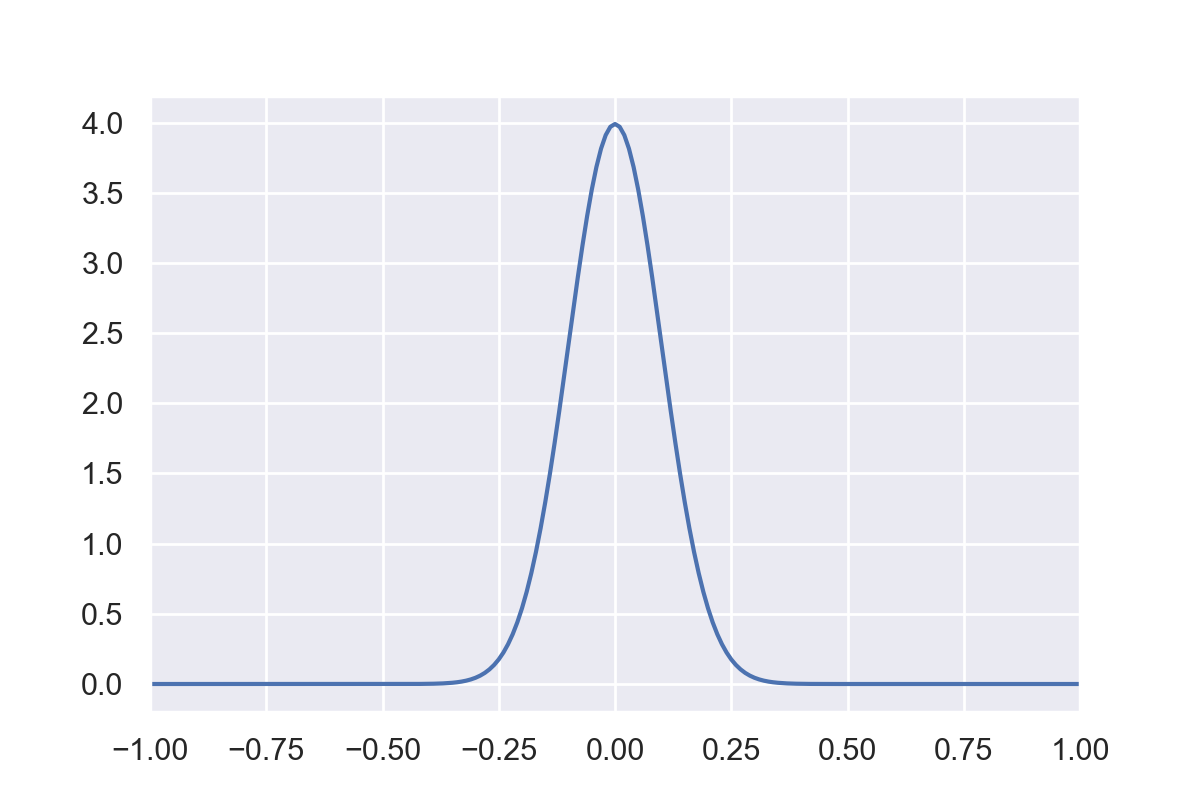

(-1, 1)

In [10]:
# Plot the initial conditions
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

line = ax.plot(x, u0)
ax.set_xlim((-1,1))

In [6]:
# For implicit time integration, we update or time advance our solution by solving
# a linear system, Au = R + b
#
# A : Matrix of coefficients coming from our difference equation
# u : Solution vector, in this case the values of u at our next time step (n+1)
# R : Explicit residual vector, in this case, the values of u at our current time step (n)
# b : Boundary condition terms moved to the RHS.

# Let's define the A matrix -- from class we know this is a *banded* matrix 
# or in other words, we know it is sparse! Do NOT invert this matrix. We 
# can solve this system much more efficiently.

# Define a tri-diagonal banded matrix (3 rows) with N columns
#
ab = np.zeros((3,N,), dtype=np.float64)

# Diagonal 
#
ab[1] = 1.0

# Upper diagonal (u_{i+1} terms)
#
ab[0] = 0.5 * beta

# Lower diagonal (u_{i-1} terms)
#
ab[2] = -0.5 * beta

# Von Neumann Boundary Condition 
#
ab[1,-1] = 1.0 + 0.5 * beta

# print(ab[0])
# print(ab[1])
# print(ab[2])

In [7]:
# Define my solution vector
# 
# un is a matrix
#    row    : the time step
#    column : the mesh point
#
# For example, u[0,1] is the value of u at time equals zero for i=2 
# in the mesh (Indexing starts at 0!!)
#
un = np.zeros((time_steps, N,), dtype=np.float64)

# Copy our initial condition into our solution vector for t^n=0.
un[0] = u0

# Time integration loop
for n in range(1,time_steps):
    # RHS
    R = np.copy(un[n-1,:])
    
    # Boundary condition at the x=0
    #
    R[0] = R[0] + 0.5 * beta * uL
    
    # Solve the system for the next time step
    #
    # A x = b
    # [N x N] [N x 1] = [N x 1]
    un[n,:] = solve_banded((1,1), ab, R)

<IPython.core.display.Javascript object>


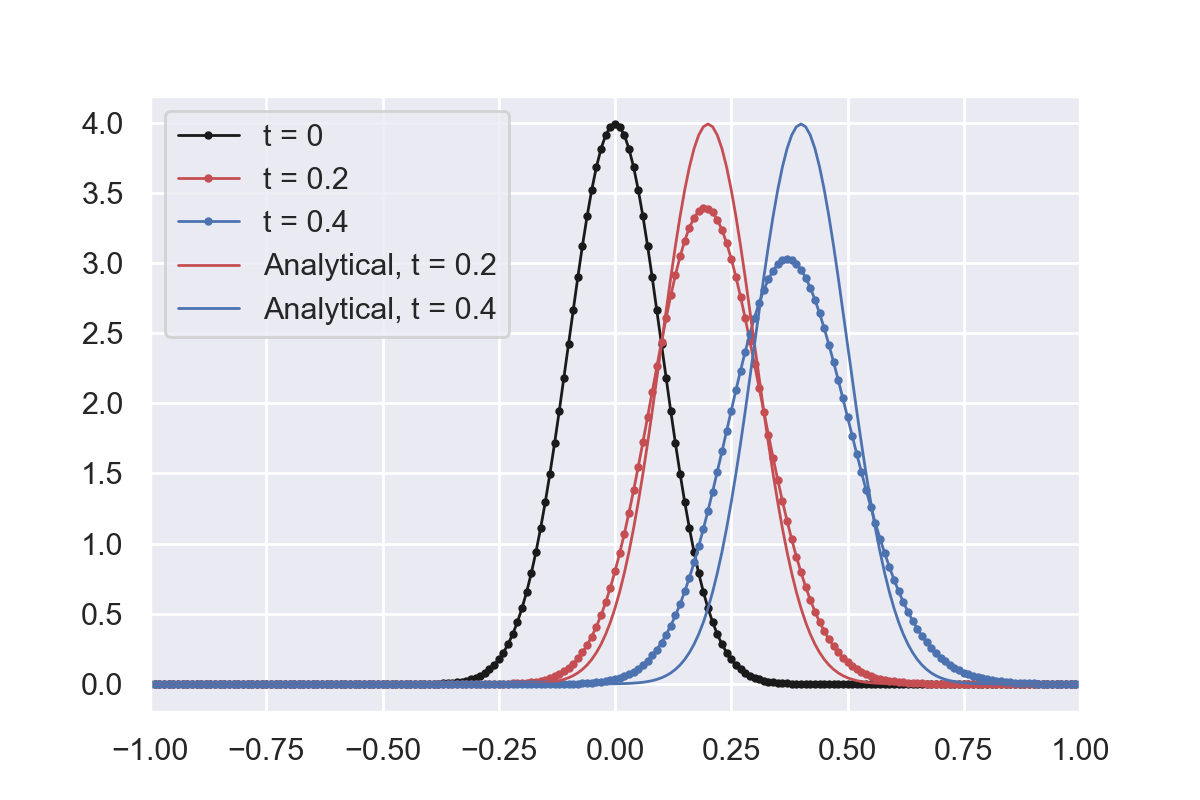

(-1, 1)

In [45]:
# Plot the solutions
#
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

line = ax.plot(x, un[0], lw=1, c='k', marker='o', ms=2, label='t = 0')

line = ax.plot(x, un[10], lw=1, c='r', marker='o', ms=2, label=f't = {10*dt:.2}')

line = ax.plot(x, un[-1], lw=1, c='b', marker='o', ms=2, label=f't = {time_steps*dt:.2}')

# Analytical solution
u_exact = gaussian(x - a * 10 * dt, mean, std)
line = ax.plot(x, u_exact, lw=1, c='r', label=f'Analytical, t = {10*dt:.2}')

u_exact = gaussian(x - a * time_steps * dt, mean, std)
line = ax.plot(x, u_exact, lw=1, c='b', label=f'Analytical, t = {time_steps*dt:.2}')


ax.legend()
ax.set_xlim((-1,1))

## Analysis

We see from the above solutions that the initial Gaussian distribution does not retain its shape. There is both a reduction in the "peak" of the distribution as well as variances in the standard deviation and position of the mean value of the distribution. What is a good metric to measure the error?

The "energy" of the pulse should be constant, $E(t)$ is constant in time, where the "energy" is defined as

$$
E(t) = \int_0^L u^2(x,t) \textrm{d}x 
$$

Taking the time derivative, 

$$
\frac{\textrm{d} E}{\textrm{d} t} = \frac{\textrm{d}}{\textrm{d}t} \int_0^L u^2(x,t) \textrm{d}x
$$

moving the time derivative inside the integral

$$
\frac{\textrm{d} E}{\textrm{d} t} = \int_0^L \frac{\partial}{\partial t} \left(  u^2  \right) \textrm{d}x
$$

and evaluating the derivative, 

$$
\frac{\textrm{d} E}{\textrm{d} t} = \int_0^L 2 u \frac{\partial u}{\partial t} \textrm{d}x
$$

Using the fact that

$$
\frac{\partial u}{\partial t} = -a \frac{\partial u}{\partial x}
$$

the partial derivative of the $u$ with respect to time can be exchanged as

$$
\frac{\textrm{d} E}{\textrm{d} t} = - a \int_0^L 2 u \frac{\partial u}{\partial x}\textrm{d}x
$$

which equals

$$
\frac{\textrm{d} E}{\textrm{d} t} = - a \int_0^L \frac{\partial u^2}{\partial x}  \textrm{d}x
$$

Now evaluating the integral is trival

$$
\frac{\textrm{d} E}{\textrm{d} t} = - a \left[ u^2(L,t) - u^2(0,t) \right] = 0
$$

We can use the fact that $E$ is by definition constant to evaulate how "good" our numerical methods are.

0.9999999989831992


<IPython.core.display.Javascript object>


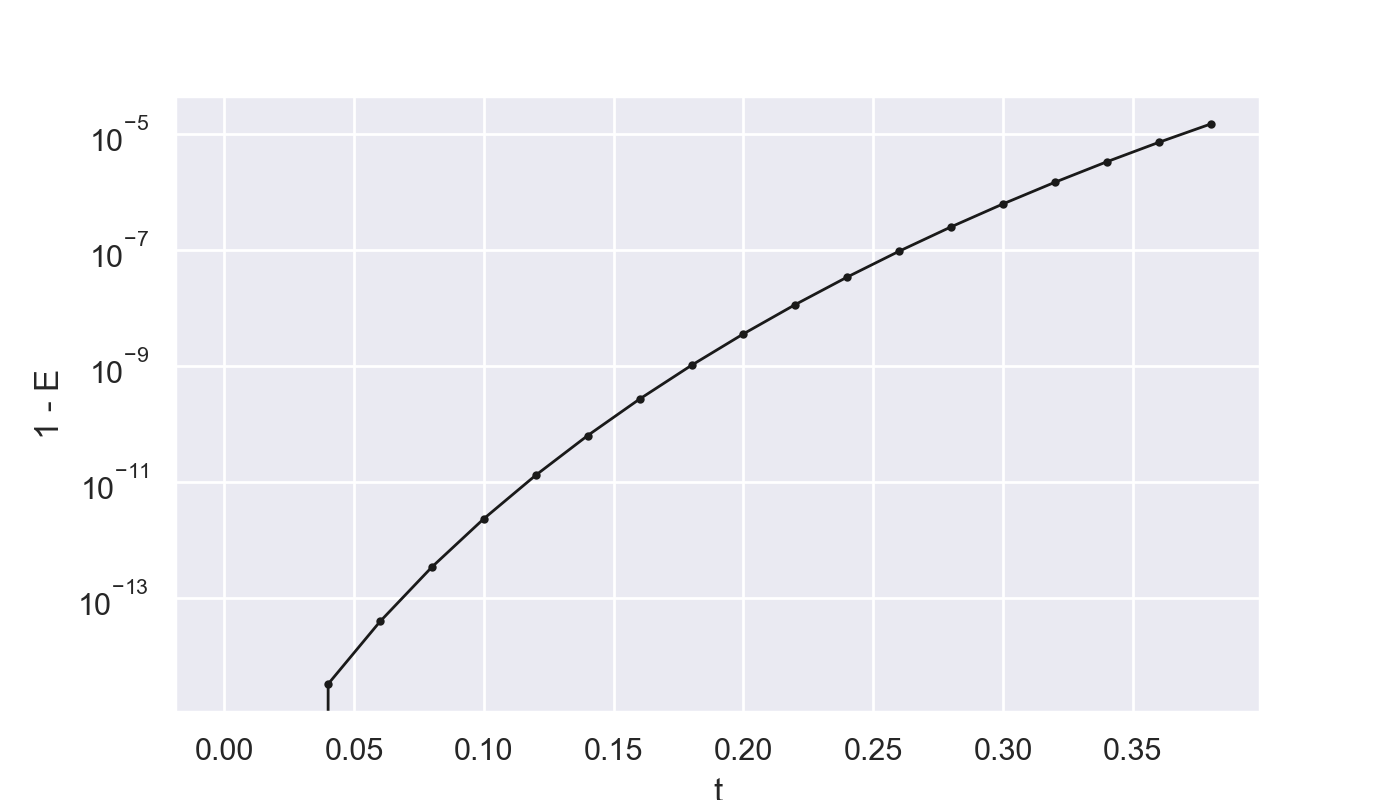

AttributeError: 'LogFormatterSciNotation' object has no attribute 'set_useOffset'

In [49]:
from matplotlib.ticker import FormatStrFormatter


energy = []
time = []

# Normalize with respect to the analytical solution
E_exact = np.trapz(u_exact, x=x)
print(E_exact)

# Compute the "energy" at each time step
for n in range(len(un)):
    E = 1 - np.trapz(un[n], x=x)
    energy.append(E)
    time.append(n * dt)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 4))

line = ax.plot(time, energy, lw=1, c='k', marker='o', ms=2)

ax.set_ylabel('1 - E')
ax.set_xlabel('t')
plt.yscale('log')
ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
